(chap-pyabf)=
# PyABF


## Python prerequisit


### Setting Up the Conda Virtual Environment for This Project

This project uses Python packages such as `numpy`, `matplotlib`, `seaborn`, and `pyabf`.  
To ensure reproducibility and avoid conflicts with other Python projects, we recommend using a **dedicated Conda virtual environment**.

---

#### 1️⃣ Create the environment

Run the following command in your terminal:

```bash
conda env create -f environment.yml
```

- This will create a new environment named jupyter-env (as specified in `environment.yml`)
- All required packages for this Jupyter Book project will be installed.

#### 2️⃣ Activate the environment
```
conda activate jupyter-env
```
Your terminal prompt should now show `(jupyter-env)`, indicating the environment is active.

#### 3️⃣ Make the environment available in Jupyter
```
python -m ipykernel install --user --name=jupyter-env --display-name "Python (jupyter-env)"
```
- This allows notebooks to select the correct kernel.

#### 4️⃣ Verify installation

You can test that everything is installed correctly:
```
python -c "import numpy, matplotlib, seaborn, pyabf; print('All imports OK!')"
```
- If no errors appear, the environment is ready to use.

#### 5️⃣ Launch Jupyter Lab or Notebook
```
# Launch Jupyter Lab
jupyter lab

# or launch classic Jupyter Notebook
jupyter notebook
```
In the notebook (top right), select Kernel `→ Python (jupyter-env)`.

![Select Kernel](pics/select_kernel.png)

#### 6️⃣ Updating the environment

If you modify environment.yml later (e.g., adding packages), update the environment:
```
conda env update -f environment.yml --prune
````
- `--prune` removes packages no longer listed in `environment.yml`.

#### ✅ Notes

- Keep all project-specific packages inside the virtual environment; do not install them in base.
- For reproducibility, commit `environment.yml` to your repository.

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pyabf

print(f"numpy: {np.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"seaborn: {sns.__version__}")
print(f"pyabf: {pyabf.__version__}")

numpy: 2.0.1
matplotlib: 3.10.0
seaborn: 0.13.2
pyabf: 2.3.8


## Exploring `abf` files

This first notebook aims to demonstrate how to analyze electrophysiological recordings from a single cell by:

- Extracting basic characteristics of the recorded signals.
- Plotting, for each recording trial (sweep, see below), the evolution of the membrane potential (voltage) and, if applicable, the injected current.

We import a few libraries:

## Welcome to the Data Science with Spikes Book

This notebook uses Python packages such as `numpy`, `matplotlib`, `pyabf`, and `seaborn`.  

To ensure reproducibility and avoid conflicts with other Python projects, we recommend using a **dedicated Conda virtual environment**.


## Setting up the environment

Run these commands in your terminal (not in the notebook):

```bash
# 1️⃣ Create the environment
conda create -n jupyter-env python=3.11

# 2️⃣ Activate the environment
conda activate jupyter-env

# 3️⃣ Install required packages
conda install numpy matplotlib seaborn
pip install pyabf jupyter-book

# 4️⃣ Make the environment available in Jupyter
python -m ipykernel install --user --name=jupyter-env --display-name "Python (jupyter-env)"


In [4]:
# Check which environment the notebook kernel is using
import numpy as np
import matplotlib.pyplot as plt
import pyabf                     # load the pyABF library
import seaborn as sns            # used for Kernel Density Estimate (KDE) plots

# Check versions (optional, useful for reproducibility)
print(f"numpy: {np.__version__}")
print(f"matplotlib: {plt.__version__}")
print(f"seaborn: {sns.__version__}")


ModuleNotFoundError: No module named 'pyabf'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyabf                     # load the pyABF library (cf. infra)
import seaborn as sns            # used for a Kernel Density Estimate (KDE) plot

# Check versions (optional, useful for reproducibility)
print(f"numpy version: {np.__version__}")
print(f"matplotlib version: {plt.__version__}")
print(f"seaborn version: {sns.__version__}")

ModuleNotFoundError: No module named 'pyabf'

We focus on specific cell, the cell # 89:

In [2]:
file_path = "lhb_bursting/cell89basal.abf"
print('path to the abf file : ',file_path)

path to the abf file :  lhb_bursting/cell89basal.abf



### `abf` files and `pyabf` library

#### ABF File Overview

An ABF (Axon Binary Format) file is a proprietary file format developed by Axon Instruments (now part of Molecular Devices) to store electrophysiological data from experiments. ABF files are commonly used to save data from experiments like patch-clamp recordings, where researchers measure electrical signals from biological systems (such as neurons or muscle cells). These files can store a variety of information, including:

- Data Traces: Time series data for one or more channels, representing signals such as voltage or current.
- Metadata: Information about the experiment, including settings for the recording, such as sampling rate, experiment type, and device configuration.
- Multiple Sweeps: An ABF file can contain multiple sweeps (individual trials or experimental runs), which may differ in parameters or conditions.

The ABF format is binary, making it efficient for large datasets, but it is not easily readable without specialized software or libraries.

#### `pyabf` Library

The `pyabf` library is a Python package designed to facilitate working with ABF files. It provides an easy-to-use interface to read and manipulate data stored in ABF files. The library makes it simpler for researchers to extract relevant information from ABF files, without having to manually parse the binary data.

Key Features of pyabf:

1.	Load ABF Files: Load an ABF file into memory and provide access to its data.
2.	Access Data Traces: Extract time-series data, such as voltage and current traces (from ADC channels).
3.	Multiple Sweep Support: Handle multiple sweeps (individual experimental runs) within a single ABF file.
4.	Extract Metadata: Retrieve metadata like channel names, experiment parameters, and other settings.
5.	Sweep Navigation: Select and navigate through multiple sweeps (trials) and analyze their data individually.

Common Functions in pyabf:

- `ABF(file_path)`: Initializes an ABF object from a given file path, loading the data into memory.
- `setSweep(sweep_index)`: Selects a specific sweep (experimental run) by its index.
- `sweepY`: Extracts the voltage (or other signal) data for the current sweep.
- `sweepX`: Extracts the time vector for the current sweep.
- `sweepC`: Extracts the command input (if available) for the current sweep.
- `adcNames`: List of ADC channel names.
- `dacNames`: List of DAC channel names.

#### On the net

The  [pyABF](https://pypi.org/project/pyabf/) library was created by [Scott Harden](https://swharden.com/about/).
Scott Harden has made pyABF available as an open-source library, aiming to simplify the process of working with ABF files in Python, making it easier for researchers to analyze and visualize their data. You can find more about pyABF and its documentation on his website: pyABF - A simple Python interface for Axon Binary Format ABF files.

- [pyABF - A simple Python interface for Axon Binary Format ABF files](https://swharden.com/pyabf/), with [git repository](https://github.com/swharden/pyABF)
- a [tutorial](https://swharden.com/pyabf/tutorial/) by [Scott W Harden]
- in Python Package Index [pypi](https://pypi.org/project/pyabf/)

### Basics about `abf` objects

Where we import the `pyabf` package and load a record file:

In [3]:
abf = pyabf.ABF(file_path)              # we load it
print(abf)                              # record characteristics 

ABF (v2.6) with 1 channel (pA), sampled at 10.0 kHz, containing 30 sweeps, having no tags, with a total length of 11.11 minutes, recorded without a protocol file.


Here `abf = pyabf.ABF(file_path)` creates an `abf` object that have:
- **attributes**: data stored in the object, and
- **methods**: functions that belong to an object and can be called to perform actions

#### Atributes
We can print more attributes:

In [4]:
print(f"{'File Path:':>20} {abf.abfFilePath}")
print(f"{'File Version:':>20} {abf.abfVersionString}")
print(f"{'Sampling Rate:':>20} {abf.dataRate} Hz")
print(f"{'Total Sweeps:':>20} {abf.sweepCount}")
print(f"{'ADC Channels:':>20} {abf.adcNames}")
print(f"{'DAC Channels:':>20} {abf.dacNames}")
print(f"{'Channel Units:':>20} {abf.sweepUnitsY}")
print(f"{'Experiment Date:':>20} {abf.abfDateTime}")

          File Path: /Users/campillo/Documents/1-now/_git.nosync/pepyna/data/lhb_bursting/cell89basal.abf
       File Version: 2.6.0.0
      Sampling Rate: 10000 Hz
       Total Sweeps: 30
       ADC Channels: ['Waveform']
       DAC Channels: ['AO #0']
      Channel Units: pA
    Experiment Date: 2024-11-08 00:00:50.086000


#### Methods

You can list all the methods of an `abf` object with `print(abf.__dict__)`.

In [5]:
methods = [method for method in dir(abf) if callable(getattr(abf, method)) and not method.startswith("__")]
print("\n".join(methods))

_dtype
_getAdcNameAndUnits
_getDacNameAndUnits
_ide_helper
_loadAndScaleData
_makeAdditionalVariables
_readHeadersV1
_readHeadersV2
getAllXs
getAllYs
headerLaunch
launchInClampFit
saveABF1
setSweep
sweepD


You have private methods (Prefixed with _), and:

- `getAllXs()`: Returns all time points (X-values) for every sweep, useful for plotting.
- `getAllYs()`: Returns all recorded signal values (Y-values) for every sweep.
- `headerLaunch()`: Likely a utility function for debugging or inspecting header information.
- `launchInClampFit()`: Opens the ABF file in ClampFit, a software from Molecular Devices used for electrophysiology data analysis.
- `saveABF1()`: Converts and saves the ABF file in version 1 format, which is older but sometimes required for compatibility.
- `setSweep(sweepIndex)`: Sets the current sweep (i.e., trial or recording segment) to a given index for further processing.
- `sweepD`: Likely an attribute or method that provides the time duration of a sweep.

Of course the main parts of the sweep are the **recorded signal** and the **command inpput**:

In [6]:
# Print voltage trace (recorded signal)
print(f"{'Voltage Trace (mV):':>25} {abf.sweepY}")

# Print command input (if available)
print(f"{'Command Input (mV):':>25} {abf.sweepC}")

      Voltage Trace (mV): [-61.2   -60.856 -61.2   ... -56.228 -56.196 -56.353]
      Command Input (mV): [0. 0. 0. ... 0. 0. 0.]


### Basic `abf` file exploration

#### Main `abf` attributes and methods

The `abf` object contains various attributes and methods that allow you to access metadata and data from the .abf file. Here are some useful attributes and how to call them:

In [7]:
print("List of sweep indexes:", ", ".join(map(str, abf.sweepList)))

List of sweep indexes: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29


In [8]:
sweep_index = 0  # Choose a specific sweep (e.g., first sweep -> index 0)
abf.setSweep(sweep_index)  

# Print voltage trace (recorded signal)
print(f"{'Voltage Trace (mV):':>25} {abf.sweepY}")

# Print command input (if available)
print(f"{'Command Input (mV):':>25} {abf.sweepC}")

# Check all available ADC channels (recorded signals)
print(f"{'Recorded Channels:':>25} {abf.adcNames}")

# Check DAC channels (command input signals)
print(f"{'Command Channels:':>25} {abf.dacNames}")

      Voltage Trace (mV): [-61.2   -60.856 -61.2   ... -56.228 -56.196 -56.353]
      Command Input (mV): [0. 0. 0. ... 0. 0. 0.]
       Recorded Channels: ['Waveform']
        Command Channels: ['AO #0']


#### Some statistics of 1 sweep 

Here, we have selected `sweep_index = 0`, representing the first sweep in the ABF file. We then compute some basic statistics of the corresponding voltage trace, such as the mean, median, min, max, standard deviation, and range of the signal:

In [9]:
data = abf.sweepY  # The voltage trace for the specific swwep

stats = {
    "Mean (mV)": np.mean(data),
    "Median (mV)": np.median(data),
    "Min (mV)": np.min(data),
    "Max (mV)": np.max(data),
    "Std Dev (mV)": np.std(data),
    "Range (mV)": np.ptp(data),  # Max - Min
}

print("\nVoltage Trace Statistics:")
for key, value in stats.items():
    print(f"{key:>20}: {value:.3f}")


Voltage Trace Statistics:
           Mean (mV): -55.656
         Median (mV): -56.853
            Min (mV): -66.204
            Max (mV): 49.191
        Std Dev (mV): 9.172
          Range (mV): 115.395


### Basics plottings

#### Plotting the voltage trace distribution

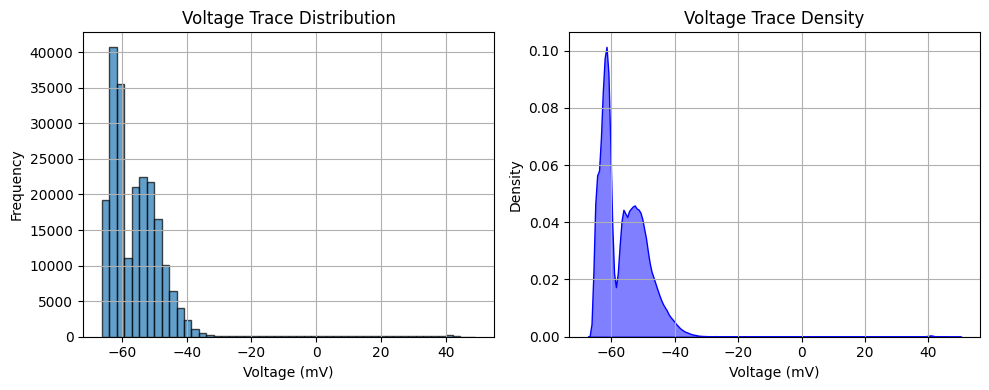

In [10]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot histogram on the first subplot
axes[0].hist(data, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel("Voltage (mV)")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Voltage Trace Distribution")
axes[0].grid(True)

# Plot KDE on the second subplot
sns.kdeplot(data, bw_adjust=0.5, fill=True, color="b", alpha=0.5, ax=axes[1])
axes[1].set_xlabel("Voltage (mV)")
axes[1].set_ylabel("Density")
axes[1].set_title("Voltage Trace Density")
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

Of course, the previous plots are not particularly interesting, as they represent the distribution of the signal while mixing both inter-burst and burst phases. A more insightful approach would be to plot the distributions separately: one for the inter-burst signal and another for the intra-burst signal. Note that the previous plots exhibit a bimodal distribution, which is certainly related to the two phases of the signal—burst and non-burst (quiescent or background activity).

#### Plotting all the sweeps of an `abf` file

In [11]:
def plot_abf():
    plt.figure(figsize=(8, 5))

    # plot every sweep (with vertical offset)
    for sweepNumber in abf.sweepList:
        abf.setSweep(sweepNumber)
        offset = 140*sweepNumber
        plt.plot(abf.sweepX, abf.sweepY+offset, color='b',lw=0.1)

    # decorate the plot
    plt.gca().get_yaxis().set_visible(False)  # hide Y axis
    plt.title(file_path)
    plt.xlabel(abf.sweepLabelX)
    plt.show()

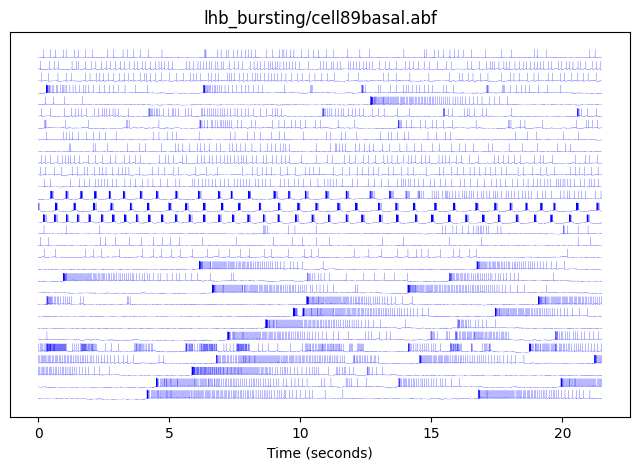

In [12]:
plot_abf()

The same but we also plote the input voltage on each sweep: here it's not so interesting because thay are null (not recorded ?):

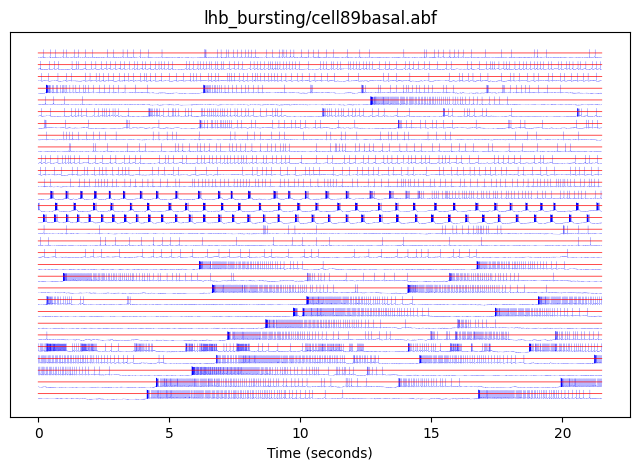

In [13]:
def plot_abf():
    plt.figure(figsize=(8, 5))

    # Plot every sweep with vertical offset
    for sweepNumber in abf.sweepList:
        abf.setSweep(sweepNumber)
        offset = 140 * sweepNumber
        plt.plot(abf.sweepX, abf.sweepY + offset, color='b', lw=0.1)  # Recorded voltage
        plt.plot(abf.sweepX, abf.sweepC + offset, color='r', lw=0.5)  # Command waveform in red

    # Decorate the plot
    plt.gca().get_yaxis().set_visible(False)  # Hide Y axis
    plt.title(file_path)
    plt.xlabel(abf.sweepLabelX)
    plt.show()

plot_abf()

#### Plotting a single sweep

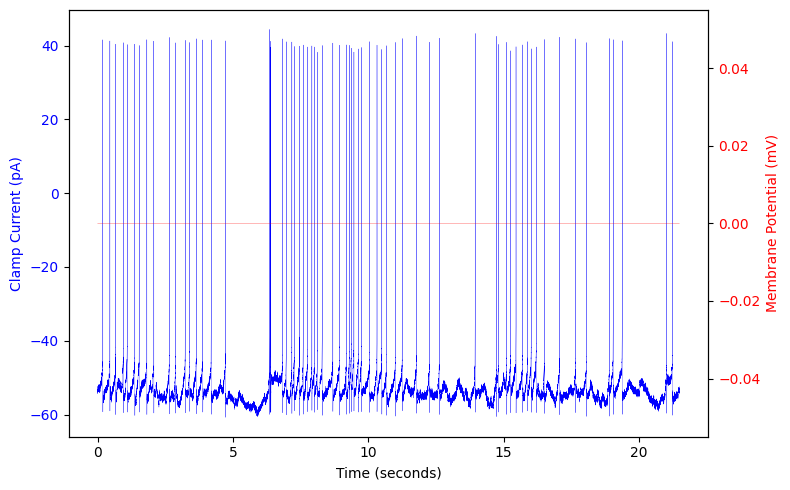

In [14]:
# Create the figure
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot the recorded curve (ADC) on the left axis
ax1.plot(abf.sweepX, abf.sweepY, color='b', lw=0.2, label="ADC waveform")
ax1.set_xlabel(abf.sweepLabelX)
ax1.set_ylabel(abf.sweepLabelY, color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for the control curve (DAC)
ax2 = ax1.twinx()
ax2.plot(abf.sweepX, abf.sweepC, color='r', lw=0.2,label="DAC waveform")
ax2.set_ylabel(abf.sweepLabelC, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Improve the layout
fig.tight_layout()
plt.show()

### Data to explore

We define a list of tuples called `data_to_explore`. Each element in `data_to_explore` is a tuple containing:
- a string = the file path of an `.abf` file,
- An integer = a sweep number associated with the file,
  
representing the cell records and the specific number of the sweep we want to explore.

In [15]:
data_to_explore = []
data_to_explore.append(("lhb_bursting/cell21basal.abf",   5))
data_to_explore.append(("lhb_bursting/cell89basal.abf",  15))
data_to_explore.append(("lhb_bursting/cell91basal.abf",   4))
data_to_explore.append(("lhb_bursting/cell98basal.abf",   9))
data_to_explore.append(("lhb_bursting/cell104basal.abf", 10))
data_to_explore.append(("lhb_bursting/cell105basal.abf",  7))
data_to_explore.append(("lhb_bursting/cell107basal.abf",  0))
data_to_explore.append(("lhb_bursting/cell209basal.abf",  4))

for abf_file, sweep_number in data_to_explore:
    print(f"ABF File: {abf_file:<30} {'Sweep Number:':>15} {sweep_number:>3}")

ABF File: lhb_bursting/cell21basal.abf     Sweep Number:   5
ABF File: lhb_bursting/cell89basal.abf     Sweep Number:  15
ABF File: lhb_bursting/cell91basal.abf     Sweep Number:   4
ABF File: lhb_bursting/cell98basal.abf     Sweep Number:   9
ABF File: lhb_bursting/cell104basal.abf    Sweep Number:  10
ABF File: lhb_bursting/cell105basal.abf    Sweep Number:   7
ABF File: lhb_bursting/cell107basal.abf    Sweep Number:   0
ABF File: lhb_bursting/cell209basal.abf    Sweep Number:   4


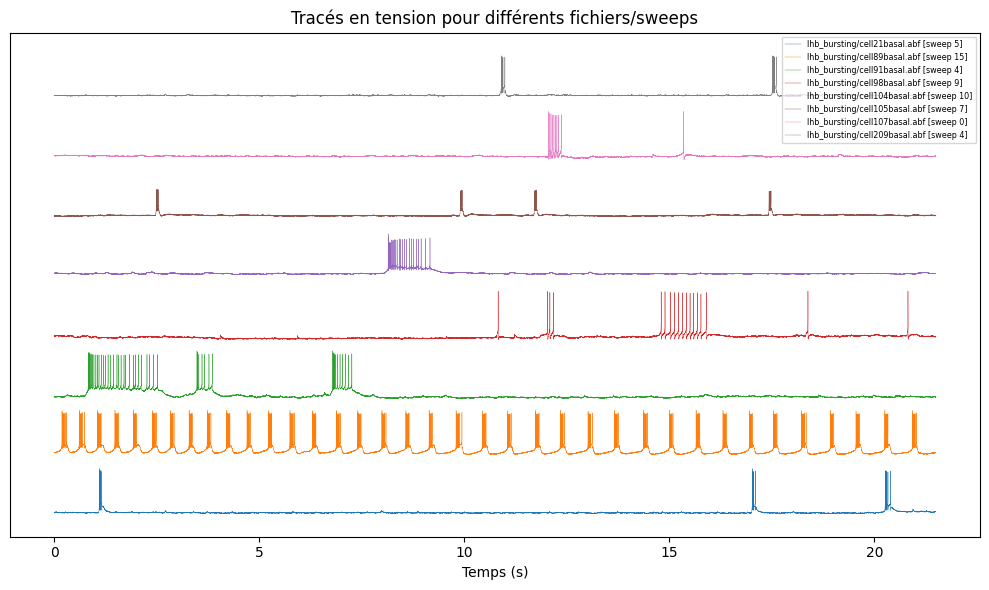

In [16]:
# Créer la figure
plt.figure(figsize=(10, 6))

# Tracer chaque fichier/sweep avec un décalage vertical
for i, (file_path, sweep_num) in enumerate(data_to_explore):
    abf = pyabf.ABF(file_path)
    abf.setSweep(sweep_num)
    offset = i * 150  # décalage vertical entre les tracés
    plt.plot(abf.sweepX, abf.sweepY + offset, lw=0.3, label=f"{file_path} [sweep {sweep_num}]")

# Mise en forme
plt.gca().get_yaxis().set_visible(False)  # cacher l'axe Y
plt.xlabel("Temps (s)")
plt.title("Tracés en tension pour différents fichiers/sweeps")
plt.legend(fontsize="xx-small", loc="upper right")
plt.tight_layout()
plt.show()